# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandoc
import nbconvert
from sklearn.model_selection import train_test_split
import time
from sklearn.tree import DecisionTreeClassifier
from memory_profiler import profile
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
start=time.time()

In [2]:
df=pd.read_csv("bank-additional-full.csv",sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.shape

(41188, 21)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [7]:
X=df.iloc[:,0:20]
Y=df.iloc[:,20:21]

# spliting Training and Testing Set

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=10)
df_train=pd.concat([X_train,Y_train],axis=1)
df_test=pd.concat([X_test,Y_test],axis=1)

In [9]:
numeric_columns=list(df._get_numeric_data().columns)
categorical_columns=list(set(df.columns)-set(numeric_columns)-set('y'))

In [10]:
unknowns=[]
for x in categorical_columns:
    if 'unknown' in list(df[x]):
        unknowns.append(x)
unknowns        

['loan', 'housing', 'default', 'education', 'job', 'marital']

# Removing Unknowns by Maximum

In [11]:
for x in unknowns:
    count=df_train[x].value_counts()
    df_train.loc[df_train[x] == "unknown",x] = count.idxmax()
    df_test.loc[df_test[x] == "unknown",x] =count.idxmax()

In [12]:
ordered_features = ['education', 'housing', 'loan', 'contact','month', 'day_of_week','poutcome']
for x in ordered_features:
    dict={x:set(df_train[x])}
    print(dict)
    dict={}

{'education': {'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'basic.4y', 'professional.course', 'university.degree'}}
{'housing': {'yes', 'no'}}
{'loan': {'yes', 'no'}}
{'contact': {'telephone', 'cellular'}}
{'month': {'apr', 'may', 'dec', 'mar', 'aug', 'sep', 'jun', 'jul', 'nov', 'oct'}}
{'day_of_week': {'thu', 'fri', 'wed', 'mon', 'tue'}}
{'poutcome': {'nonexistent', 'failure', 'success'}}


# Labeling Ordered Features

This features are already ordered so we have just labeled the data manually by label encoder

In [13]:
label_ordered_features={'education':{'illiterate':0, 'basic.4y':4,'basic.6y':6,'basic.9y':9,'high.school':10,'professional.course':11,'university.degree':12},
                       'housing':{'yes':1,'no':0},
                       'loan':{'yes':1,'no':0},
                       'contact':{'telephone':0,'cellular':1},
                       'month':{'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},
                       'day_of_week':{'mon':1,'tue':2,'wed':3,'thu':4,'fri':5},
                       'poutcome':{'nonexistent':0,'success':1,'failure':2}}

In [14]:
for x in ordered_features:
    df_train = df_train.replace({x:label_ordered_features[x]})
    df_test = df_test.replace({x:label_ordered_features[x]}) 

# One Hot Encoding For Unordered Categorical Variable

for Unordered features we have used the one hot encoder

In [15]:
unordered_variables=['job','marital']

In [16]:
for x in unordered_variables:
        label_encoder = LabelEncoder()
        label_encoder.fit(df_train[x])
        df_train[x] = label_encoder.transform(df_train[x])
        df_test[x] = label_encoder.transform(df_test[x])


In [17]:
df_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5285,51,9,1,6,no,1,1,0,5,5,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1196,50,1,1,9,no,1,0,0,5,4,...,2,999,0,0,1.1,93.994,-36.4,4.855,5191.0,no
33666,29,6,2,11,no,1,0,1,5,3,...,2,999,1,2,-1.8,92.893,-46.2,1.281,5099.1,yes
29515,42,7,1,12,no,1,0,1,4,1,...,6,999,0,0,-1.8,93.075,-47.1,1.405,5099.1,no
15848,25,9,2,11,no,1,0,1,7,1,...,2,999,0,0,1.4,93.918,-42.7,4.960,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,58,0,1,10,no,1,0,1,7,4,...,4,999,2,2,-1.7,94.215,-40.3,0.810,4991.6,no
28017,30,0,1,12,no,1,0,1,4,4,...,3,999,0,0,-1.8,93.075,-47.1,1.483,5099.1,yes
29199,41,10,1,9,no,0,0,1,4,5,...,1,999,1,2,-1.8,93.075,-47.1,1.405,5099.1,no
40061,29,0,2,10,no,1,0,1,7,4,...,1,6,1,1,-1.7,94.215,-40.3,0.810,4991.6,yes


In [18]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(df_train[unordered_variables])
one_hot_encoded_array_train = one_hot_encoder.transform(df_train[unordered_variables])
one_hot_encoded_df_train = pd.DataFrame(one_hot_encoded_array_train, index=df_train.index)
one_hot_encoded_array_test = one_hot_encoder.transform(df_test[unordered_variables])
one_hot_encoded_df_test = pd.DataFrame(one_hot_encoded_array_test, index=df_test.index)

In [19]:
one_hot_encoded_df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
5285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1196,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33666,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
40061,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
df_train = pd.concat([df_train,one_hot_encoded_df_train], axis=1) 
df_test = pd.concat([df_test,one_hot_encoded_df_test], axis=1)

In [21]:
df_train = df_train.drop(unordered_variables, axis=1) 
df_test = df_test.drop(unordered_variables, axis=1)

In [22]:
df_train

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,...,4,5,6,7,8,9,10,11,12,13
5285,51,6,no,1,1,0,5,5,168,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1196,50,9,no,1,0,0,5,4,135,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33666,29,11,no,1,0,1,5,3,774,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29515,42,12,no,1,0,1,4,1,17,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15848,25,11,no,1,0,1,7,1,292,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,58,10,no,1,0,1,7,4,214,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28017,30,12,no,1,0,1,4,4,243,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29199,41,9,no,0,0,1,4,5,135,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
40061,29,10,no,1,0,1,7,4,480,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Normalization of Numerical Variable

In [23]:
numerical_variable = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [24]:
normalizer=MinMaxScaler()
normalizer.fit(df_train[numerical_variable])
df_train[numerical_variable]=normalizer.transform(df_train[numerical_variable])
df_test[numerical_variable]=normalizer.transform(df_test[numerical_variable])

# Final Training and Testing Set

In [25]:
df_train=df_train.drop(['pdays','default'],axis=1)


In [26]:
df_test=df_test.drop(['pdays','default'],axis=1)

In [27]:
Y_train1=df_train.iloc[:,16:17]
X_train1=df_train.drop(['y'],axis=1)
Y_test1=df_test['y']
X_test1=df_test.drop(['y'],axis=1)

In [28]:
X_train1

,age,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,...,4,5,6,7,8,9,10,11,12,13
5285,0.419753,6,1,1,0,5,5,168,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1196,0.407407,9,1,0,0,5,4,135,0.018182,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33666,0.148148,11,1,0,1,5,3,774,0.018182,0.142857,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29515,0.308642,12,1,0,1,4,1,17,0.090909,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15848,0.098765,11,1,0,1,7,1,292,0.018182,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,0.506173,10,1,0,1,7,4,214,0.054545,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28017,0.160494,12,1,0,1,4,4,243,0.036364,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29199,0.296296,9,0,0,1,4,5,135,0.000000,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
40061,0.148148,10,1,0,1,7,4,480,0.000000,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
Y_train1

,y
5285,no
1196,no
33666,yes
29515,no
15848,no
...,...
40059,no
28017,yes
29199,no
40061,yes


# Fitting the Data into Decision Tree Classifier

We have taken the maximum depth=6 since at this depth we are getting the best results, and since the data is highly imbalanced so we have taken some wights on the classes. the 'yes' is the majority case so we have taken larger weghts coresspondent to 'yes'

In [30]:
 decisiontree=DecisionTreeClassifier(max_depth = 6,random_state=42,class_weight={'no':2,'yes':5.8})

In [31]:
%load_ext memory_profiler

%memit decisiontree.fit(X_train1,Y_train1)

peak memory: 226.29 MiB, increment: 4.06 MiB


In [32]:
Y_pred=decisiontree.predict(X_test1)

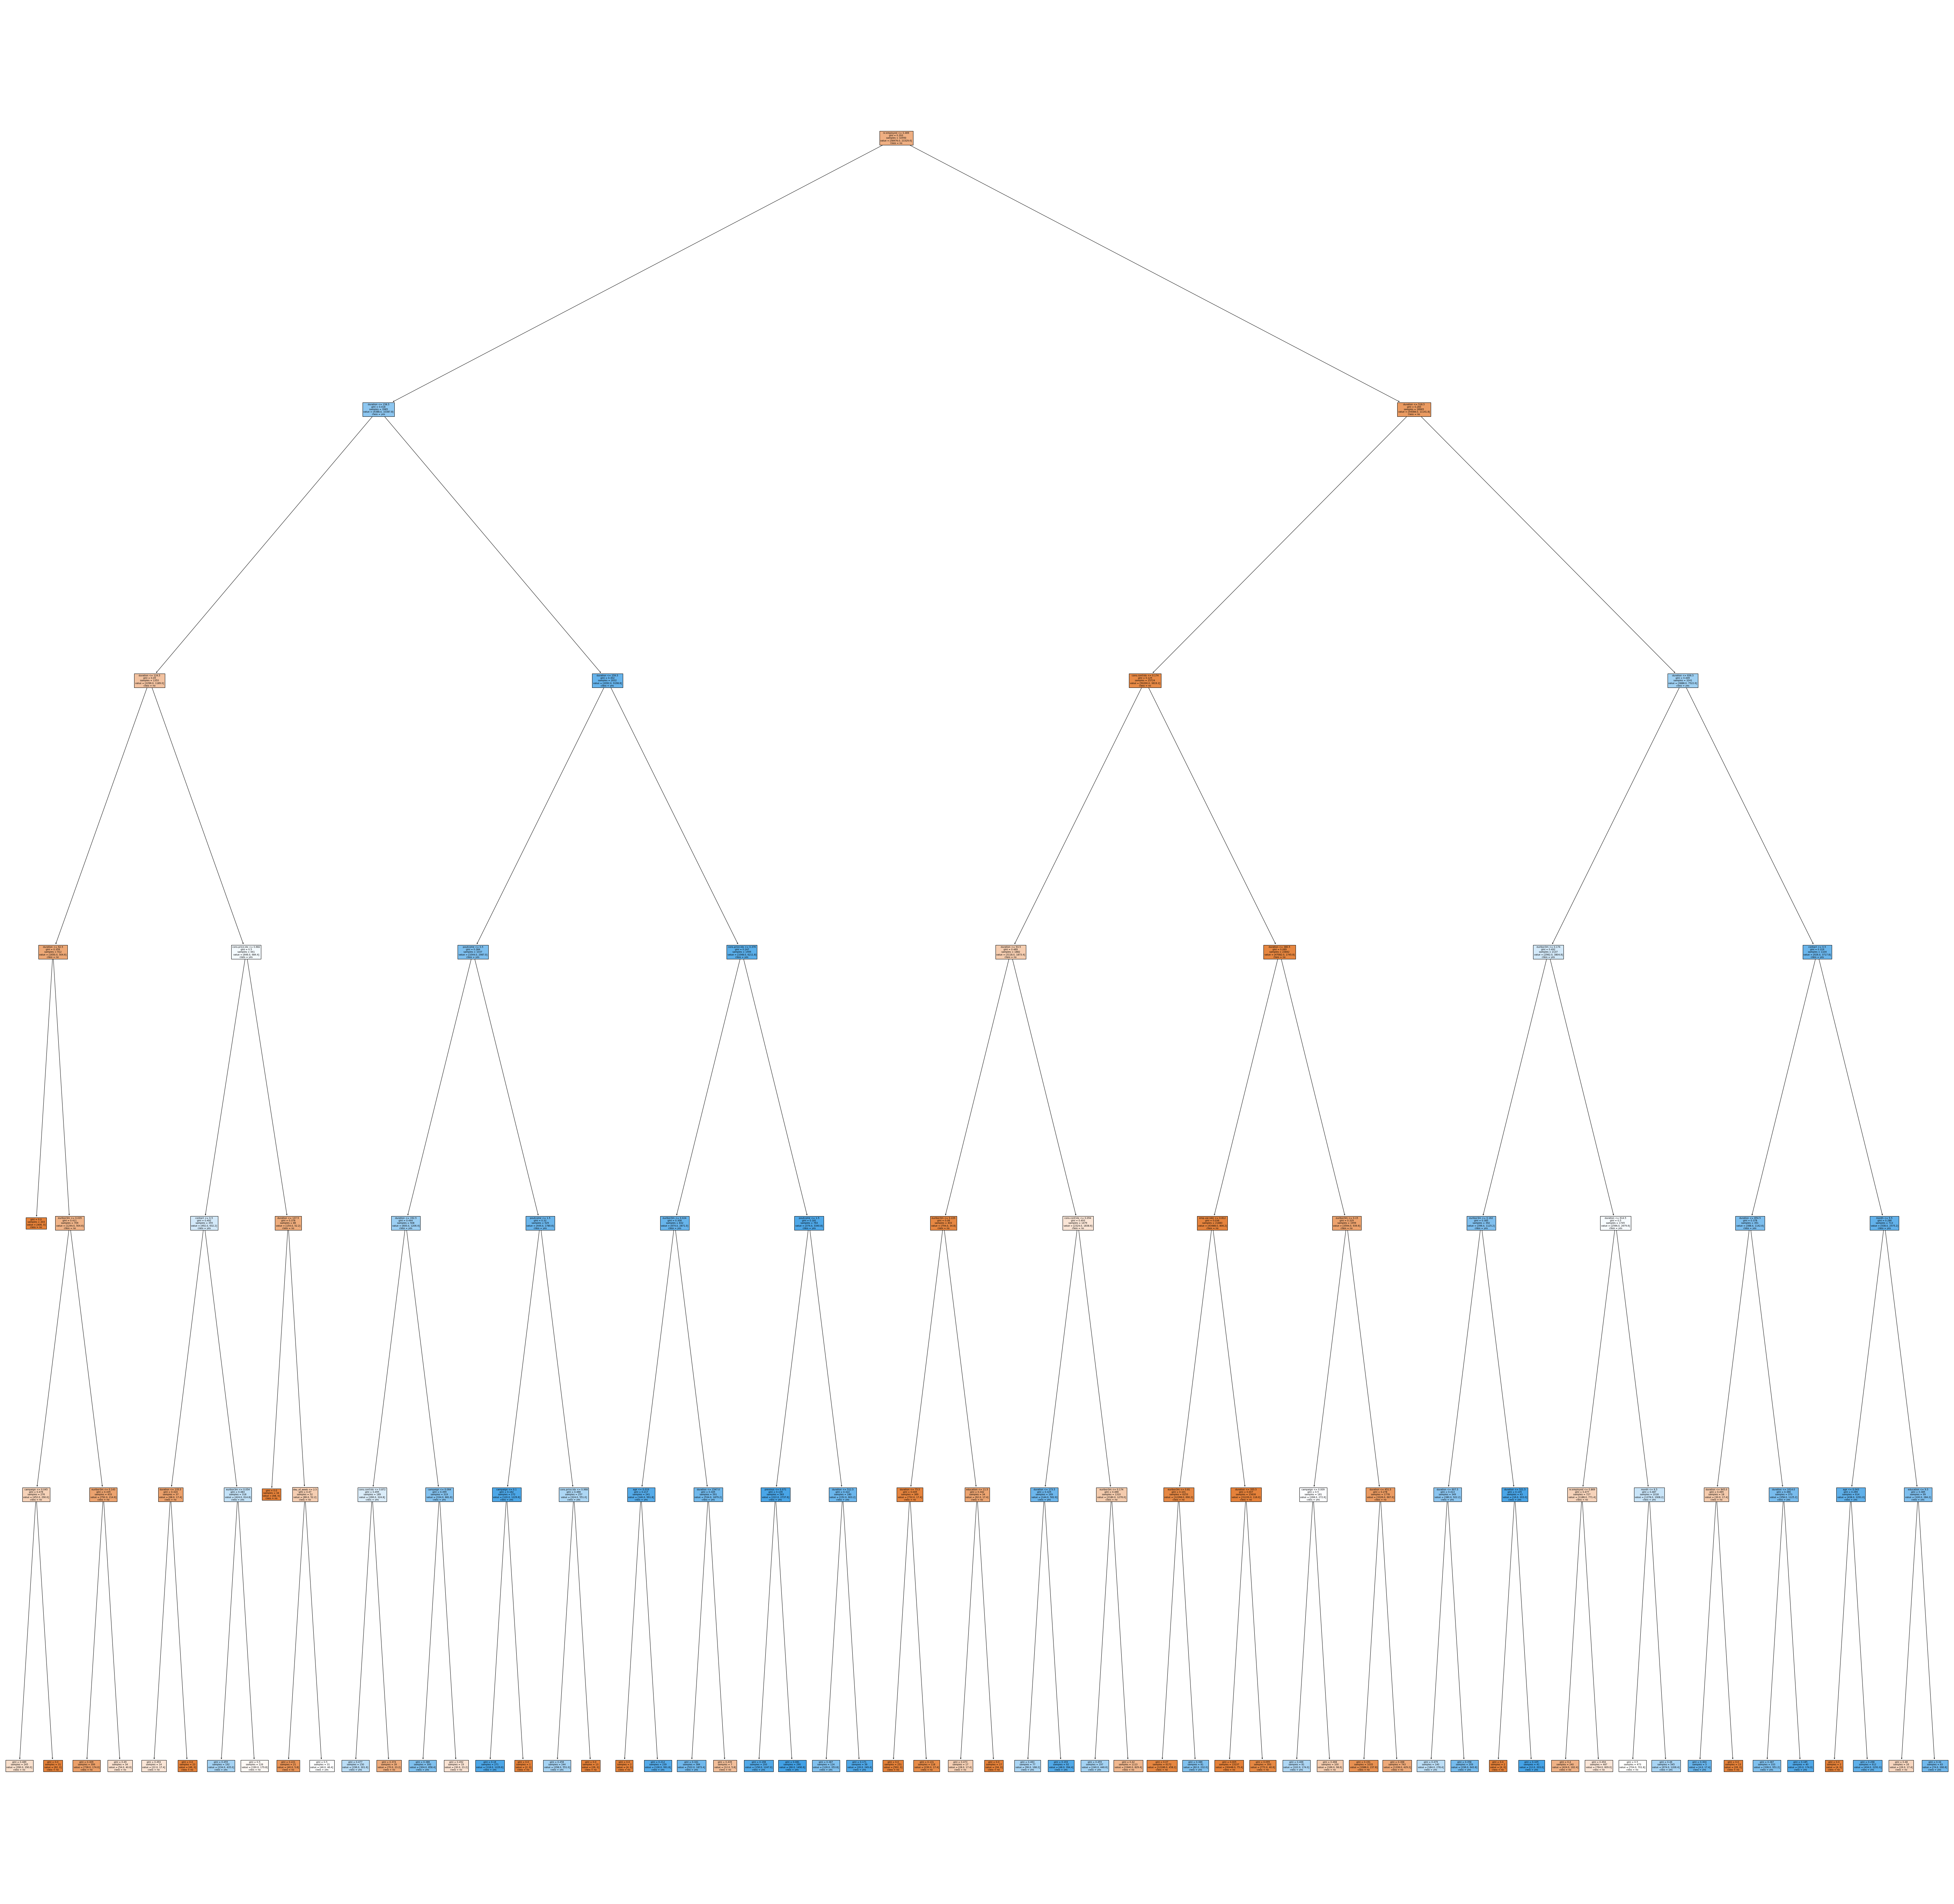

In [33]:
from sklearn import tree
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(decisiontree, 
                   feature_names=X_train1.columns[:],  
                   class_names=np.unique(Y_train1),
                   filled=True)

In [34]:
new=pd.DataFrame()
new['test']=Y_test1
new['pred']=Y_pred

In [35]:
new

,test,pred
29773,no,no
14070,no,no
39364,yes,no
29279,no,no
11888,no,no
...,...,...
29225,yes,no
37798,yes,yes
25228,no,no
23709,no,no


# Performance Measure

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score =accuracy_score(Y_test1, Y_pred)
print(accuracy_score*100,'%')

89.70623937848993 %


In [37]:
from sklearn.metrics import f1_score
F1_score=f1_score(Y_test1, Y_pred,average='weighted')
print(F1_score*100,'%')

90.42498416992575 %


In [38]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(Y_test1,Y_pred, labels=['no','yes'])
con_matrix

array([[6702,  608],
       [ 240,  688]], dtype=int64)

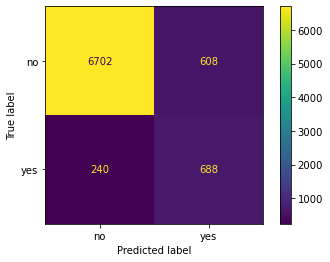

In [39]:
from sklearn.metrics import plot_confusion_matrix

fig = plt.figure()
plot_confusion_matrix(decisiontree,X_test1,Y_test1,display_labels=['no','yes'])
plt.savefig("decision_tree_confusion_matrix")
plt.close(fig)

In [40]:
end=time.time()
end-start

6.706279754638672